In [2]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [3]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [4]:
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [26]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


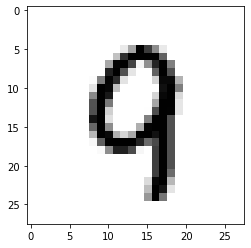

In [27]:
plt.imshow(images[1].numpy().squeeze(), cmap='gray_r');

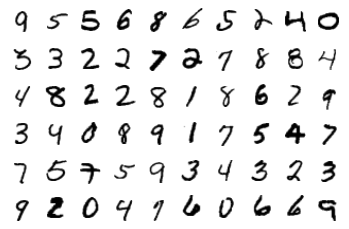

In [28]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [29]:
print(images[1][0].numpy().reshape(-1).shape)
x=images[1][0].numpy().reshape(-1)
with open('testimg.h', 'w') as testfile:
    testfile.write('float sample[] = {\n')
    for wx in range(0,len(x)):
        if wx%5==0 and wx!=0:
            testfile.write('\n')
        if wx == len(x)-1:
            testfile.write(str(x[wx])+'f')
        else:
            testfile.write(str(x[wx])+'f,')
    testfile.write('};\n')



(784,)


In [30]:
with open('acc.txt', 'w') as testfile:
    for wx in range(0,len(x)):
        testfile.write(str(x[wx]))
        if wx < len(x)-1:
            testfile.write('\n')


In [31]:
input_size = 784
hidden_sizes = [30, 30, 10]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[2], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=30, bias=True)
  (1): ReLU()
  (2): Linear(in_features=30, out_features=30, bias=True)
  (3): ReLU()
  (4): Linear(in_features=30, out_features=10, bias=True)
  (5): ReLU()
  (6): Linear(in_features=10, out_features=10, bias=True)
  (7): LogSoftmax(dim=1)
)


In [32]:
model = torch.load('torch_mnist_model.pt')

In [33]:
params = model.state_dict()
for k,v in params.items():
    # print parameter name
    print(k,params[k].numpy().shape)
layer1_weight = params['0.weight'].numpy().reshape(-1).tolist()
layer1_bias = params['0.bias'].numpy().tolist()
layer2_weight = params['2.weight'].numpy().reshape(-1).tolist()
layer2_bias = params['2.bias'].numpy().tolist()
layer3_weight = params['4.weight'].numpy().reshape(-1).tolist()
layer3_bias = params['4.bias'].numpy().tolist()
classifier_weight = params['6.weight'].numpy().reshape(-1).tolist()
classifier_bias = params['6.bias'].numpy().tolist()
print(len(layer1_bias))
print(len(layer2_bias))
print(len(layer3_bias))
print(len(classifier_bias))

0.weight (30, 784)
0.bias (30,)
2.weight (30, 30)
2.bias (30,)
4.weight (10, 30)
4.bias (10,)
6.weight (10, 10)
6.bias (10,)
30
30
10
10


In [34]:
with open('classifier_weights.txt', 'w') as testfile:
    testfile.write('//Layer1 Weights \n')
    testfile.write('float layer1_weight[] = {\n')
    for wx in range(0,len(layer1_weight)):
        if wx%5==0 and wx!=0:
            testfile.write('\n')
        if wx == len(layer1_weight)-1:
            testfile.write(str(layer1_weight[wx])+'f')
        else:
            testfile.write(str(layer1_weight[wx])+'f,')
    testfile.write('};\n')
    testfile.write('float layer1_bias[] = {\n')
    for rx in range(0,len(layer1_bias)):
        if rx != len(layer1_bias)-1:
            testfile.write(str(layer1_bias[rx])+'f,')
        else:
            testfile.write(str(layer1_bias[rx])+'f')
    testfile.write('};\n')
    
    testfile.write('//Layer2 Weights \n')
    testfile.write('float layer2_weight[] = {\n')
    for wx in range(0,len(layer2_weight)):
        if wx%5==0 and wx!=0:
            testfile.write('\n')
        if wx == len(layer2_weight)-1:
            testfile.write(str(layer2_weight[wx])+'f')
        else:
            testfile.write(str(layer2_weight[wx])+'f,')
    testfile.write('};\n')
    testfile.write('float layer2_bias[] = {\n')
    for rx in range(0,len(layer2_bias)):
        if rx != len(layer2_bias)-1:
            testfile.write(str(layer2_bias[rx])+'f,')
        else:
            testfile.write(str(layer2_bias[rx])+'f')
    testfile.write('};\n')

    testfile.write('//Layer3 Weights \n')
    testfile.write('float layer3_weight[] = {\n')
    for wx in range(0,len(layer3_weight)):
        if wx%5==0 and wx!=0:
            testfile.write('\n')
        if wx == len(layer3_weight)-1:
            testfile.write(str(layer3_weight[wx])+'f')
        else:
            testfile.write(str(layer3_weight[wx])+'f,')
    testfile.write('};\n')
    testfile.write('float layer3_bias[] = {\n')
    for rx in range(0,len(layer3_bias)):
        if rx != len(layer3_bias)-1:
            testfile.write(str(layer3_bias[rx])+'f,')
        else:
            testfile.write(str(layer3_bias[rx])+'f')
    testfile.write('};\n')
    
    testfile.write('//Classifier Weights \n')
    testfile.write('float classifier_weight[] = {\n')
    for wx in range(0,len(classifier_weight)):
        if wx%5==0 and wx!=0:
            testfile.write('\n')
        if wx == len(classifier_weight)-1:
            testfile.write(str(classifier_weight[wx])+'f')
        else:
            testfile.write(str(classifier_weight[wx])+'f,')
    testfile.write('};\n')
    testfile.write('float classifier_bias[] = {\n')
    for rx in range(0,len(classifier_bias)):
        if rx != len(classifier_bias)-1:
            testfile.write(str(classifier_bias[rx])+'f,')
        else:
            testfile.write(str(classifier_bias[rx])+'f')
    testfile.write('};\n')
    

In [35]:
# OpenCL setup
import pyopencl as cl
import deviceinfo

In [36]:
# Ask the user to select a platform/device on the CLI
context = cl.create_some_context()

# Print out device info
deviceinfo.output_device_info(context.devices[0])

# Create a command queue
queue = cl.CommandQueue(context)

Device is NVIDIA GeForce GTX 1650 TiGPU from NVIDIA Corporation with a max of 16 compute units


In [37]:
params = model.state_dict()
for k,v in params.items():
    # print parameter name
    print(k,params[k].numpy().shape)
layer1_weight = params['0.weight'].numpy().reshape(-1)
layer1_bias = params['0.bias'].numpy()
layer2_weight = params['2.weight'].numpy().reshape(-1)
layer2_bias = params['2.bias'].numpy()
layer3_weight = params['4.weight'].numpy().reshape(-1)
layer3_bias = params['4.bias'].numpy()
classifier_weight = params['6.weight'].numpy().reshape(-1)
classifier_bias = params['6.bias'].numpy()
print(len(layer1_bias))
print(len(layer2_bias))
print(len(layer3_bias))
print(len(classifier_bias))

0.weight (30, 784)
0.bias (30,)
2.weight (30, 30)
2.bias (30,)
4.weight (10, 30)
4.bias (10,)
6.weight (10, 10)
6.bias (10,)
30
30
10
10


In [38]:
h_sample = x
h_result_layer1 = np.empty(1 * len(layer1_bias)).astype(np.float32)
h_result_layer2 = np.empty(1 * len(layer2_bias)).astype(np.float32)
h_result_layer3 = np.empty(1 * len(layer3_bias)).astype(np.float32)
h_result_classifier = np.empty(1 * len(classifier_bias)).astype(np.float32)

# device input buffer
d_sample = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf=h_sample)

# device buffers 
d_layer1_weight = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf=layer1_weight)
d_layer1_bias = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf=layer1_bias)
d_layer2_weight = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf=layer2_weight)
d_layer2_bias = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf=layer2_bias)
d_layer3_weight = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf=layer3_weight)
d_layer3_bias = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf=layer3_bias)
d_classifier_weight = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf=classifier_weight)
d_classifier_bias = cl.Buffer(context, cl.mem_flags.READ_ONLY | cl.mem_flags.COPY_HOST_PTR, hostbuf=classifier_bias)

d_result_layer1 = cl.Buffer(context, cl.mem_flags.WRITE_ONLY, h_result_layer1.nbytes)
d_result_layer2 = cl.Buffer(context, cl.mem_flags.WRITE_ONLY, h_result_layer2.nbytes)
d_result_layer3 = cl.Buffer(context, cl.mem_flags.WRITE_ONLY, h_result_layer3.nbytes)
d_result_classifier = cl.Buffer(context, cl.mem_flags.WRITE_ONLY, h_result_classifier.nbytes)

In [39]:
kernelSource = open("gesturenet.cl").read()
program = cl.Program(context, kernelSource).build()

In [40]:
conv3x3 = program.conv2d3x3
conv3x3.set_scalar_arg_dtypes([np.int32, np.int32, np.int32, np.int32, np.int32, np.int32, \
                               None, None, None, None])

maxpool = program.maxpool2d
maxpool.set_scalar_arg_dtypes([np.int32, np.int32, None, None])

conv1x1 = program.conv2d1x1
conv1x1.set_scalar_arg_dtypes([np.int32, np.int32, np.int32,\
                               None, None, None, None])

avgpool = program.avgpool2d
avgpool.set_scalar_arg_dtypes([np.int32,np.int32,None, None])

fc = program.fc
fc.set_scalar_arg_dtypes([np.int32,np.int32,None,None,None,None])

In [41]:
import time
rtime = time.time()
print(len(h_sample))
# First
fc(queue,(len(layer1_bias),),None,len(h_sample),1,d_sample,d_layer1_weight,d_layer1_bias,d_result_layer1)
# Second
fc(queue,(len(layer2_bias),),None,len(layer1_bias),1,d_result_layer1,d_layer2_weight,d_layer2_bias,d_result_layer2)
# Third
fc(queue,(len(layer3_bias),),None,len(layer2_bias),1,d_result_layer2,d_layer3_weight,d_layer3_bias,d_result_layer3)
# classifier
fc(queue,(len(classifier_bias),),None,len(layer3_bias),0,d_result_layer3,d_classifier_weight,d_classifier_bias,d_result_classifier)

queue.finish()
rtime = time.time() - rtime
print("The kernel ran in", rtime, "seconds")
#copy result from gpu
cl.enqueue_copy(queue, h_result_classifier, d_result_classifier)
queue.finish()
label_opencl = np.argmax(h_result_classifier)
print('the label index prediction of OpenCL implement: %d' % label_opencl)
print(h_result_classifier)

784
The kernel ran in 0.0029942989349365234 seconds
the label index prediction of OpenCL implement: 9
[-2.0307968 -2.8713381 -3.1091504  2.3391392  3.7440507  1.3290014
 -8.648548   2.7663178  0.2693586 10.572882 ]


In [21]:
#copy result from gpu
cl.enqueue_copy(queue, h_result_layer1, d_result_layer1)
queue.finish()
print(h_result_layer1)

[1.8735132 0.5591438 3.9249516 0.        0.        0.        0.
 4.0050554 3.826429  0.        0.        0.        0.        0.
 0.        2.9337611 3.6939385 0.        1.5440896 1.1235722 0.
 1.5972582 0.        0.        0.        6.7362742 0.        1.1317103
 0.        4.1571956]


In [22]:
#copy result from gpu
cl.enqueue_copy(queue, h_result_layer2, d_result_layer2)
queue.finish()
print(h_result_layer2)

[4.811312   3.9099517  1.2816051  0.89881307 0.         0.2634211
 0.         4.217744   6.1556125  0.9622579  5.2006335  2.808739
 0.37418255 0.51341134 1.6291945  2.6081164  6.394692   3.8753629
 0.         1.5064454  0.         0.         4.538434   0.
 0.         0.         4.513915   1.8362867  0.         1.1345121 ]


In [23]:
#copy result from gpu
cl.enqueue_copy(queue, h_result_layer3, d_result_layer3)
queue.finish()
print(h_result_layer3)

[ 0.03884356  0.          7.8044076   1.927817    3.8597367   0.
  1.5960485   4.6883564   4.0461216  11.361809  ]


In [24]:
print(h_sample)

[-1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         